In [61]:
import pandas as pd
import numpy as np

USvideos = pd.read_csv("USvideos.csv", error_bad_lines = False)
UScomments = pd.read_csv("UScomments.csv",error_bad_lines = False)



b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
/Users/hayesbarber/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [62]:
UScomments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [63]:
USvideos.shape

(7992, 11)

In [64]:
USvideos.nunique()

video_id          2364
title             2398
channel_title     1230
category_id         16
tags              2204
views             7939
likes             6624
dislikes          2531
comment_total     4152
thumbnail_link    2364
date                40
dtype: int64

In [65]:
USvideos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7992 entries, 0 to 7991
Data columns (total 11 columns):
video_id          7992 non-null object
title             7992 non-null object
channel_title     7992 non-null object
category_id       7992 non-null int64
tags              7992 non-null object
views             7992 non-null int64
likes             7992 non-null int64
dislikes          7992 non-null int64
comment_total     7992 non-null int64
thumbnail_link    7992 non-null object
date              7992 non-null float64
dtypes: float64(1), int64(5), object(5)
memory usage: 686.9+ KB


In [66]:
UScomments.shape

(691400, 4)

In [67]:
UScomments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [68]:
UScomments.dropna(inplace=True)

In [69]:
UScomments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [70]:
UScomments.shape

(691375, 4)

In [71]:
UScomments.nunique()

video_id          2266
comment_text    434076
likes             1284
replies            479
dtype: int64

In [72]:
UScomments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691375 entries, 0 to 691399
Data columns (total 4 columns):
video_id        691375 non-null object
comment_text    691375 non-null object
likes           691375 non-null object
replies         691375 non-null object
dtypes: object(4)
memory usage: 26.4+ MB


In [73]:
UScomments.drop(41587, inplace=True)

In [74]:
UScomments = UScomments.reset_index().drop('index',axis=1)

In [75]:
UScomments.likes = UScomments.likes.astype(int)
UScomments.replies = UScomments.replies.astype(int)

In [76]:
UScomments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [77]:
#remove special characters
UScomments['comment_text'] = UScomments['comment_text'].str.replace("[^a-zA-Z#]", " ")

In [78]:
UScomments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it s yo big day,4,0
1,XpVt6Z1Gjjo,I ve been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN attendance,3,0
4,XpVt6Z1Gjjo,trending,3,0


In [79]:
#removing insignificant words
UScomments['comment_text'] = UScomments['comment_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [80]:
UScomments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul,4,0
1,XpVt6Z1Gjjo,been following from start your vine channel ha...,3,0
2,XpVt6Z1Gjjo,Kong maverick,3,0
3,XpVt6Z1Gjjo,attendance,3,0
4,XpVt6Z1Gjjo,trending,3,0


In [81]:
#making everything lowercase
UScomments['comment_text'] = UScomments['comment_text'].apply(lambda x:x.lower())

In [82]:
UScomments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,logan paul,4,0
1,XpVt6Z1Gjjo,been following from start your vine channel ha...,3,0
2,XpVt6Z1Gjjo,kong maverick,3,0
3,XpVt6Z1Gjjo,attendance,3,0
4,XpVt6Z1Gjjo,trending,3,0


In [83]:
#break comments into tokens
token = UScomments['comment_text'].apply(lambda x: x.split())
token.head()

0                                        [logan, paul]
1    [been, following, from, start, your, vine, cha...
2                                     [kong, maverick]
3                                         [attendance]
4                                           [trending]
Name: comment_text, dtype: object

In [84]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wnl = WordNetLemmatizer()


In [85]:
#lemmatization
token.apply(lambda x: [wnl.lemmatize(i) for i in x])
token.head()

0                                        [logan, paul]
1    [been, following, from, start, your, vine, cha...
2                                     [kong, maverick]
3                                         [attendance]
4                                           [trending]
Name: comment_text, dtype: object

In [86]:
for i in range(len(token)):
    token[i] = ' '.join(token[i])
UScomments['comment_text'] = token
UScomments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,logan paul,4,0
1,XpVt6Z1Gjjo,been following from start your vine channel ha...,3,0
2,XpVt6Z1Gjjo,kong maverick,3,0
3,XpVt6Z1Gjjo,attendance,3,0
4,XpVt6Z1Gjjo,trending,3,0


In [87]:
from textblob import TextBlob

def pol(text):
    a=str(text)
    b=TextBlob(a)
    return b.sentiment.polarity
UScomments['polarity']=UScomments.comment_text.apply(pol)

def checker(text):
    if text>0:
        return 1
    elif text<0:
        return -1
    else:
        return 0
UScomments['polarity']=UScomments['polarity'].apply(checker)

In [88]:
UScomments.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,logan paul,4,0,0
1,XpVt6Z1Gjjo,been following from start your vine channel ha...,3,0,0
2,XpVt6Z1Gjjo,kong maverick,3,0,0
3,XpVt6Z1Gjjo,attendance,3,0,0
4,XpVt6Z1Gjjo,trending,3,0,0


In [89]:
UScomments.nunique()

video_id          2266
comment_text    382522
likes             1059
replies            368
polarity             3
dtype: int64

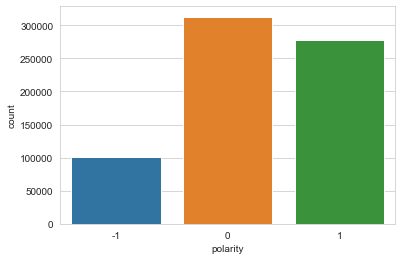

In [90]:
import seaborn as sns

sns.set_style('whitegrid')
sns.countplot(x='polarity',data=UScomments)

In [91]:
#naive bayes implementation
#split into training and test data
from sklearn.model_selection import train_test_split
y = UScomments.polarity
x = UScomments.comment_text
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train.head()


146548      warning pizza bear monsters vote bernie sanders
81209        that ugly bitch looks like just fell from tree
673453         wait confused hurricane british isles before
91239     seth need down their local station rinse their...
414214    trending with views clearly youtube allowing p...
Name: comment_text, dtype: object

In [92]:
#vectorize dataset
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_train_dtm

<553099x114608 sparse matrix of type '<class 'numpy.int64'>'
	with 4302481 stored elements in Compressed Sparse Row format>

In [93]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<138275x114608 sparse matrix of type '<class 'numpy.int64'>'
	with 1067116 stored elements in Compressed Sparse Row format>

In [94]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_dtm, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [95]:
y_pred_class = mnb.predict(X_test_dtm)

In [96]:
from sklearn import metrics
naiveAccuracy = metrics.accuracy_score(y_test, y_pred_class)
naiveAccuracy

0.872189477490508
Precision: 0.872189477490508
Precision: 0.872189477490508


Text(34.0, 0.5, 'Actual classes')

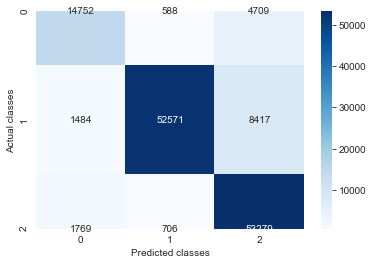

In [97]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
cfm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cfm, annot=True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [98]:
#traditional logistic regression
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

X_test_dtm = vect.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)

lrAccuracy = metrics.accuracy_score(y_test, y_pred_class)
lrAccuracy

/Users/hayesbarber/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hayesbarber/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/hayesbarber/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9856445489061653

Text(34.0, 0.5, 'Actual classes')

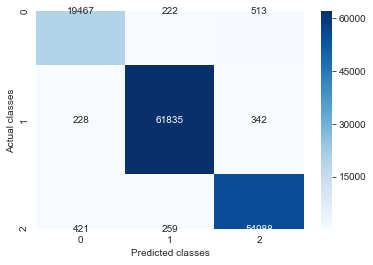

In [99]:
cfm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cfm, annot=True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [100]:
#logistic regression implementation using SGDClassifier
from sklearn.linear_model import SGDClassifier
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train.head()

678518                                  sisters want gengar
561377    love watching videos they always make smile la...
607575                                 fuck these youtubers
574608    talking points policy papers what required jus...
469309    refrigerator tips rose bacon once unwrapped ne...
Name: comment_text, dtype: object

In [101]:
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_train_dtm

<553099x114497 sparse matrix of type '<class 'numpy.int64'>'
	with 4306274 stored elements in Compressed Sparse Row format>

In [102]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<138275x114497 sparse matrix of type '<class 'numpy.int64'>'
	with 1063150 stored elements in Compressed Sparse Row format>

In [103]:
sgd = SGDClassifier()
sgd.fit(X_train_dtm, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [104]:
y_pred_class = sgd.predict(X_test_dtm)

In [105]:

sgdAccuracy = metrics.accuracy_score(y_test, y_pred_class)
sgdAccuracy

0.9638980292894594

Text(34.0, 0.5, 'Actual classes')

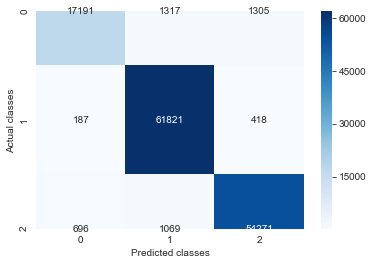

In [106]:
cfm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cfm, annot=True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [107]:
X_test.head()

624723                            surprised didn lonzo time
609514                                 exactly that amazing
304142          hate mannnnn sickkkkkk this trap style only
66309                                      niana cute funny
46895     loved mike excited each time post video this w...
Name: comment_text, dtype: object

In [108]:
y_pred_class

array([ 1,  1, -1, ...,  0,  0,  0])

In [109]:
X_test

624723                            surprised didn lonzo time
609514                                 exactly that amazing
304142          hate mannnnn sickkkkkk this trap style only
66309                                      niana cute funny
46895     loved mike excited each time post video this w...
                                ...                        
362522           happy that city right hope enjoy your stay
247813    from what cowboys kneeled during anthem that good
465031                                         project cars
173629                                          like donuts
62378          alan walker protector just copied from alfos
Name: comment_text, Length: 138275, dtype: object

In [110]:
Xarray = X_test.as_matrix(columns = None)
vids = dict(zip(Xarray,y_pred_class))

/Users/hayesbarber/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [111]:
#df = pd.DataFrame.from_dict(vids,columns=['comment-text','sentiment'],orient='index')
df = pd.DataFrame(vids.items(),columns=['comment-text','sentiment'])
df.head()

,comment-text,sentiment
0,surprised didn lonzo time,1
1,exactly that amazing,1
2,hate mannnnn sickkkkkk this trap style only,-1
3,niana cute funny,1
4,loved mike excited each time post video this w...,1


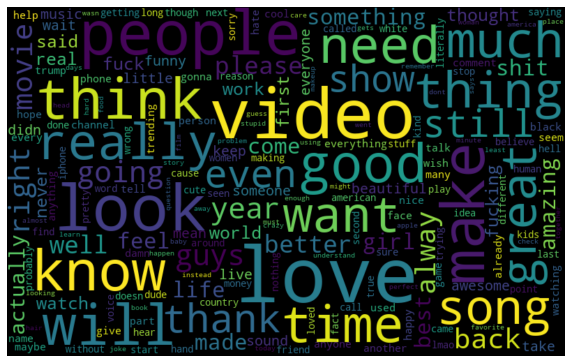

In [112]:
#some data analysis using SGD findings
from wordcloud import WordCloud
#word cloud most commonly used words
allComments = ' '.join([text for text in df['comment-text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(allComments)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

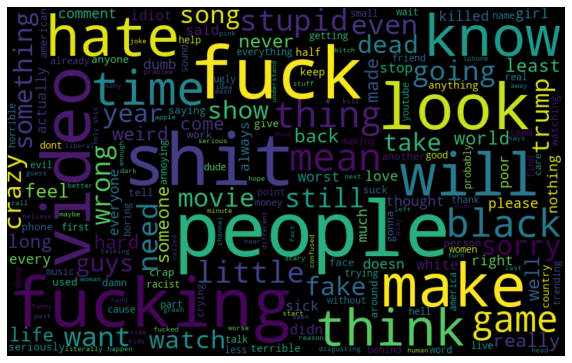

In [113]:
#word cloud for negative comments
negative = df[df['sentiment'] == -1]

allComments = ' '.join([text for text in negative['comment-text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(allComments)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

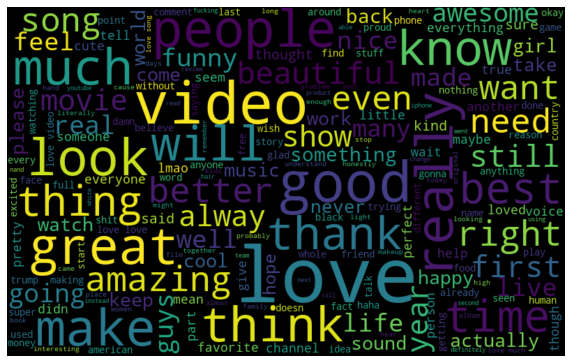

In [114]:
#word cloud for positive comments
positive = df[df['sentiment'] == 1]

allComments = ' '.join([text for text in positive['comment-text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(allComments)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

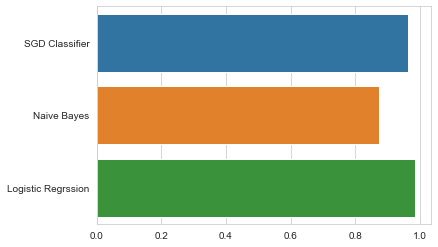

In [115]:
#charts to compare performance 
y = ["SGD Classifier", "Naive Bayes","Logistic Regrssion"]
x = [sgdAccuracy, naiveAccuracy,lrAccuracy]

sns.barplot(x=x,y=y)


In [116]:
df.describe()

,sentiment
count,109037.000000
mean,0.273751
std,0.695414
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000
